In [13]:
import config
import game
from visualise import vis
import model

import tensorflow.keras as keras

import numpy as np
from matplotlib import pyplot as plt

In [2]:
lines = open("training_data.log").readlines()
data = [[eval(x) for x in line.strip().split('\t')]  for line in lines]

xs = [l[0] for l in data]
values = [float(l[1]) for l in data]
probs = [l[2] for l in data]

xs = np.array(xs)
values = np.array(values)
probs = np.array(probs)

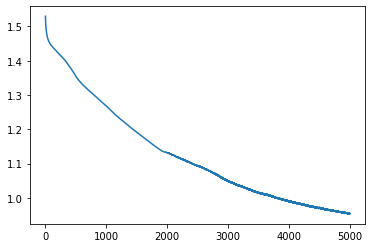

In [34]:
class MyModel():
    def __init__(self):
        inp_layer = keras.Input(shape=(9,))
        l1 = keras.layers.Dense(20, activation="relu")(inp_layer)
        l2 = keras.layers.Dense(20, activation="relu")(l1)
        prob_logits = keras.layers.Dense(9, activation="relu")(l2)
        prob_head = keras.layers.Activation("softmax")(prob_logits)
        value_head = keras.layers.Dense(1, activation="tanh")(l2)
        self.model = keras.Model(inputs=inp_layer, outputs=[prob_head, value_head])
        # self.pred_model = keras.Model(inputs=inp_layer, outputs=[prob_head, value_head])
        self.model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.1, decay=1e-4), loss=[
            keras.losses.KLDivergence(),
            keras.losses.MeanSquaredError()
        ])

    def predict(self, gamestate):
        return self.model(gamestate.to_image())

    def train(self, data, epochs, verbose = False):
        xs, probs, values = data
        history = self.model.fit(xs, [probs, values], batch_size=config.batch_size, epochs=epochs, verbose=verbose, shuffle=True)
        return history

net = MyModel()
hist = net.train([xs, probs, values], 5000)
plt.plot(hist.history['loss'])

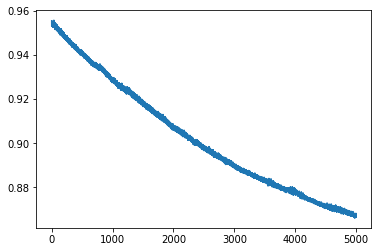

In [35]:
hist = net.train([xs, probs, values], 5000)
plt.plot(hist.history['loss'])

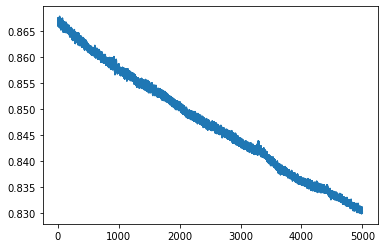

In [36]:
hist = net.train([xs, probs, values], 5000)
plt.plot(hist.history['loss'])

In [37]:
g = game.GameState()
g = g.next_state(1)
print(vis(str(g.to_image())))
net.predict(g)

. X .
. . .
. . .



[<tf.Tensor: shape=(1, 9), dtype=float32, numpy=
 array([[0.17079718, 0.06823235, 0.1650302 , 0.1074262 , 0.10892744,
         0.0891085 , 0.09356696, 0.05887019, 0.13804105]], dtype=float32)>,
 <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.13537578]], dtype=float32)>]

In [21]:
for x, v, p in zip(xs, values, probs):
    if (x == g.to_image()).all():
        print(x, v, p)

[0 1 0 0 0 0 0 0 0] 1.0 [0.10526316 0.         0.10526316 0.15789474 0.15789474 0.10526316
 0.15789474 0.10526316 0.10526316]
[0 1 0 0 0 0 0 0 0] -1.0 [0.10526316 0.         0.10526316 0.15789474 0.15789474 0.10526316
 0.15789474 0.10526316 0.10526316]
[0 1 0 0 0 0 0 0 0] 1.0 [0.10526316 0.         0.10526316 0.10526316 0.10526316 0.21052632
 0.10526316 0.10526316 0.15789474]
[0 1 0 0 0 0 0 0 0] 0.0 [0.21052632 0.         0.10526316 0.10526316 0.10526316 0.10526316
 0.10526316 0.10526316 0.15789474]
[0 1 0 0 0 0 0 0 0] -1.0 [0.10526316 0.         0.10526316 0.10526316 0.10526316 0.21052632
 0.10526316 0.10526316 0.15789474]
[0 1 0 0 0 0 0 0 0] 1.0 [0.21052632 0.         0.10526316 0.10526316 0.10526316 0.10526316
 0.10526316 0.10526316 0.15789474]
[0 1 0 0 0 0 0 0 0] -1.0 [0.10526316 0.         0.10526316 0.15789474 0.15789474 0.10526316
 0.15789474 0.10526316 0.10526316]
[0 1 0 0 0 0 0 0 0] 1.0 [0.05263158 0.         0.05263158 0.63157895 0.05263158 0.05263158
 0.05263158 0.05263158 0